# Mean circumpolar basal melt rates and pattern

In [14]:
# load roms history output as Xarray dataset
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

from features.rotate_vector_roms import rotate_vector_roms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0006.nc')
ds = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
grid_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_small_grd.nc')
grd = xr.open_dataset(grid_path)

In [6]:
ds['m'] = ds.m*(3600*24*365) #m/s -> m/a

In [88]:
#prepare the quiver plot showing velocity arrows
angle = np.zeros_like(grd.lon_rho.values)
u_rho,v_rho = rotate_vector_roms(ds.ubar.mean('ocean_time').values, ds.vbar.mean('ocean_time').values, angle)
oo = (grd.zice < 0.0)&(grd.mask_rho==1)
u_rho[~oo]=np.nan
v_rho[~oo]=np.nan

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


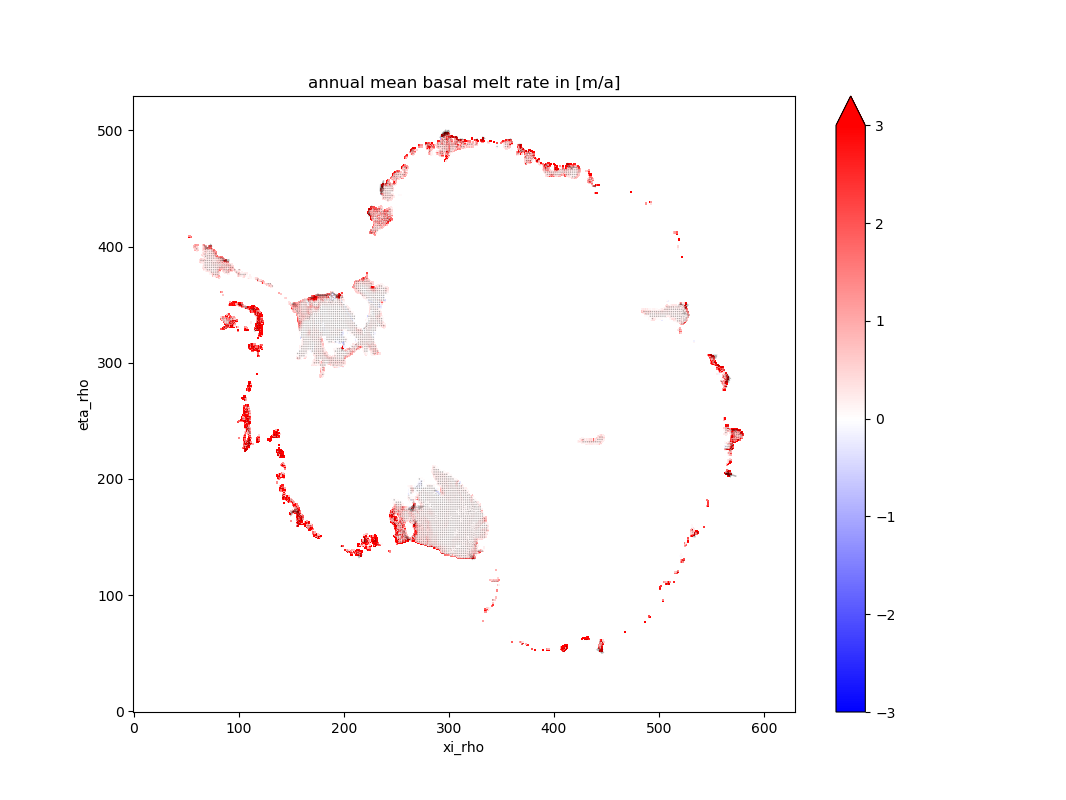

In [91]:
%matplotlib notebook
bl = 2
plt.close()
ds.m.where((grd.zice < 0.0)&(grd.mask_rho==1)).mean('ocean_time').plot(cmap=plt.cm.bwr,size=8,vmin=-3,vmax=3)
quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u_rho[::bl,::bl],v_rho[::bl,::bl],
                     pivot="mid", color='black',alpha=0.3,scale_units='xy',scale=0.01)
#plt.quiverkey(quiverp, 0.75, 0.90, 0.2, r'$20 \frac{cm}{s}$', labelpos='E',coordinates='figure')
plt.title('annual mean basal melt rate in [m/a]')
plt.show()

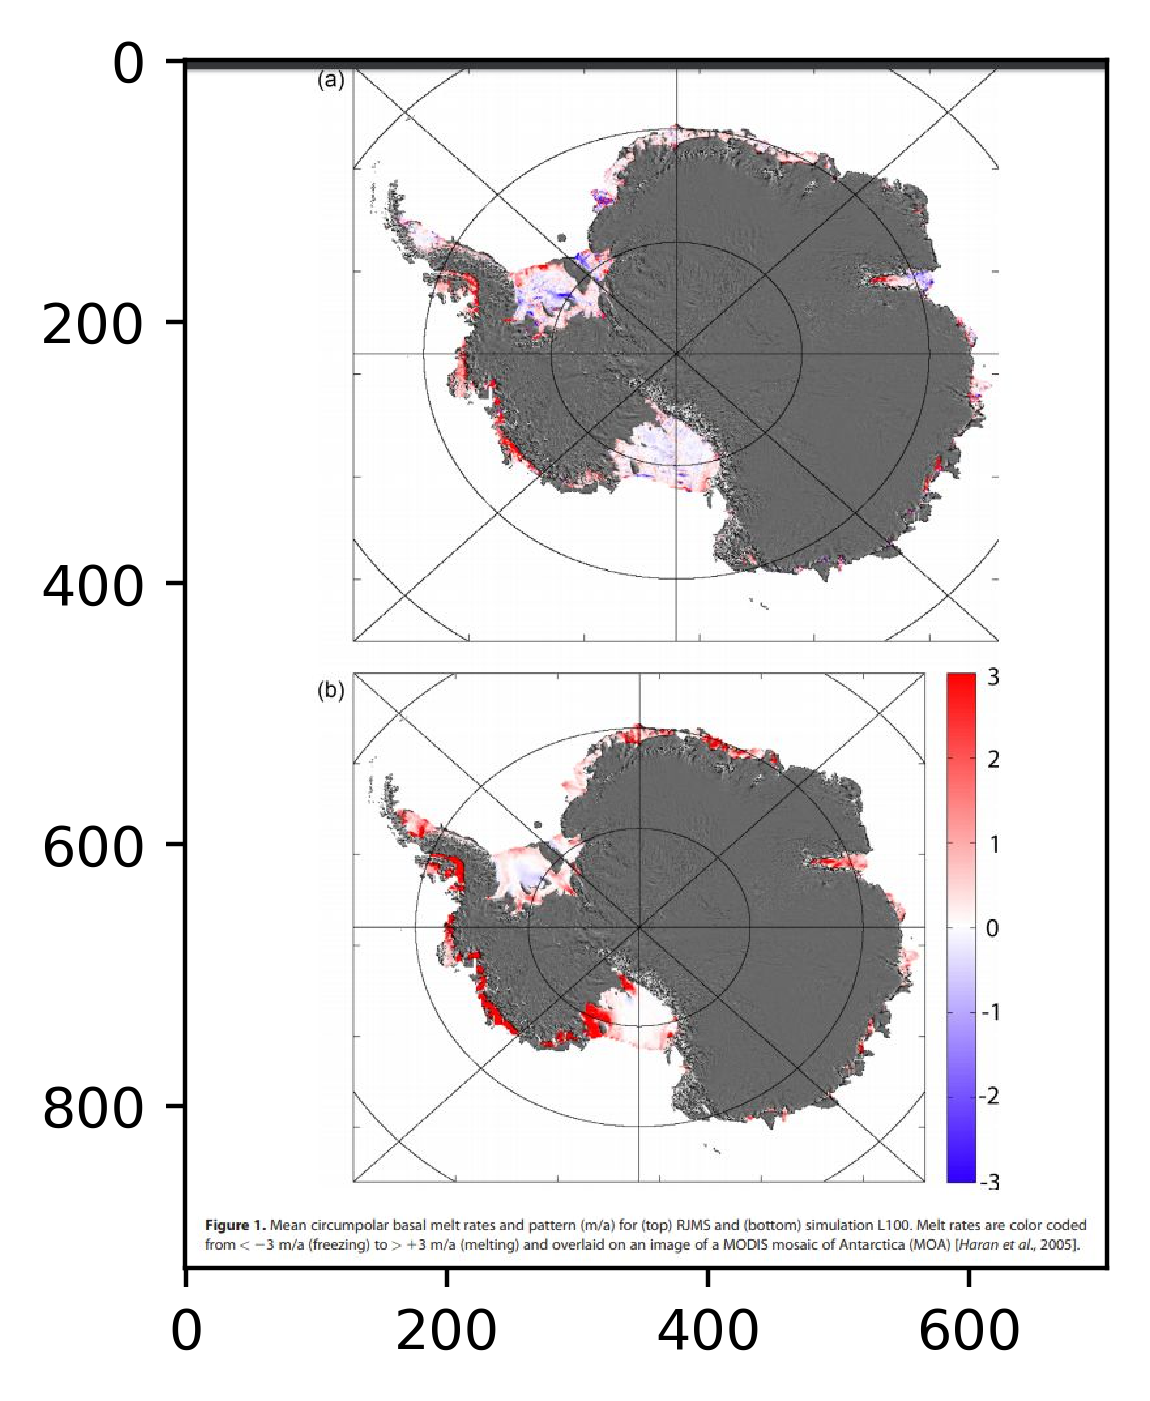

In [14]:
filename = '../../reports/figures/bm_schodlok.png'
image = plt.imread(filename)

plt.close()
plt.figure(dpi=400)
plt.imshow(image)

# Total basal mass loss

In [19]:
dA = 1/(grd.pm*grd.pn)
rho0 = 1025
rho0onrhoi = 1025/917

bmb = ds.m.mean('ocean_time').where((grd.zice < 0.0)&(grd.mask_rho==1))*dA*rho0*rho0onrhoi*(10**-12)
print('Basal mass loss in Gt/a: ',bmb.sum().values)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Basal mass loss in Gt/a:  1202.3492936377097
